In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
x=df['YearsExperience']
y=df['Salary']

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
len(x_train),len(y_train)

(24, 24)

In [9]:
len(x_test),len(y_test)

(6, 6)

In [10]:
training_data=pd.DataFrame({'x_train':x_train,'y_train':y_train})
testing_data=pd.DataFrame({'x_test':x_test,'y_test':y_test})

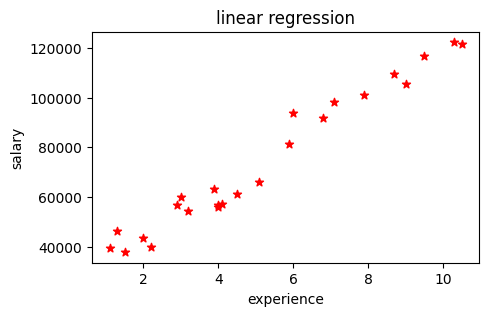

In [11]:
plt.figure(figsize=(5,3))
plt.title('linear regression')
plt.xlabel('experience')
plt.ylabel('salary')
plt.scatter(x=x_train,y=y_train,color='r',marker='*')
plt.show()

In [12]:
x_train=x_train.values.reshape(-1,1)

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [14]:
reg.fit(x_train,y_train)

LinearRegression()

In [15]:
reg.coef_

array([9423.81532303])

In [16]:
reg.intercept_

np.float64(25321.583011776813)

#train performance

In [17]:
ans_train=reg.predict(x_train)
ans_train

array([122386.880839  , 107308.77632215,  63016.8443039 ,  35687.77986711,
        46053.97672244,  73383.04115923,  52650.64744857,  63959.2258362 ,
        63016.8443039 ,  99769.72406372,  37572.54293172,  39457.30599632,
       110135.92091906,  44169.21365784,  92230.6718053 , 114847.82858057,
        80922.09341766, 124271.6439036 ,  89403.52720839,  55477.79204548,
        62074.4627716 ,  67728.75196542,  81864.47494996,  53593.02898087])

In [18]:
training_data['training_ans']=ans_train
training_data

,x_train,y_train,training_ans
28,10.3,122391.0,122386.880839
24,8.7,109431.0,107308.776322
12,4.0,56957.0,63016.844304
0,1.1,39343.0,35687.779867
4,2.2,39891.0,46053.976722
16,5.1,66029.0,73383.041159
5,2.9,56642.0,52650.647449
13,4.1,57081.0,63959.225836
11,4.0,55794.0,63016.844304
22,7.9,101302.0,99769.724064


In [19]:
s=0
for i in training_data.index:
  s=s+(training_data['y_train'][i]-training_data['training_ans'][i])**2
print(s/len(training_data))

27102249.73126139


In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,ans_train)

27102249.73126139

In [21]:
s=0
for i in training_data.index:
  s=s+(training_data['y_train'][i]-training_data['training_ans'][i])**2
print(np.sqrt(s/len(training_data)))

5205.982110155719


In [22]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_train,ans_train)

5205.982110155719

In [23]:
n=0
d=0
for i in training_data.index:
  n=n+(training_data['y_train'][i]-training_data['training_ans'][i])**2
  d=d+(training_data['y_train'][i]-training_data['y_train'].mean())**2
print(f'accuracy {1-(n)/d}')

accuracy 0.9645401573418146


In [24]:
from sklearn.metrics import r2_score
r2_score(y_train,ans_train)

0.9645401573418146

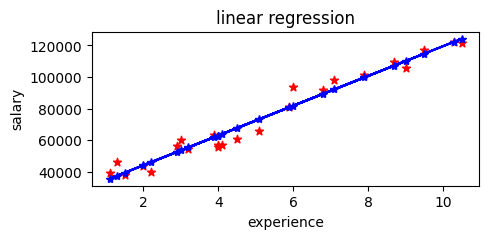

In [25]:
plt.figure(figsize=(5,2))
plt.title('linear regression')
plt.xlabel('experience')
plt.ylabel('salary')
plt.scatter(x=x_train,y=y_train,color='r',marker='*')
plt.plot(x_train,ans_train,color='b',marker='*')
plt.show()

#testing data

In [26]:
ans_test=reg.predict(x_test.values.reshape(-1,1))
ans_test

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [27]:
testing_data['test_ans']=ans_test
testing_data

,x_test,y_test,test_ans
27,9.6,112635.0,115790.210113
15,4.9,67938.0,71498.278095
23,8.2,113812.0,102596.868661
17,5.3,83088.0,75267.804224
8,3.2,64445.0,55477.792045
9,3.7,57189.0,60189.699707


In [28]:
mean_squared_error(y_test,ans_test)

49830096.85590839

In [29]:
print(f'accuracy {r2_score(y_test,ans_test)}')

accuracy 0.9024461774180497


checking own data

In [30]:
9423.81532303  * 15 +  25321.583011776813

166678.81285722682

In [31]:
reg.predict([[15]])

array([166678.81285724])

#saving training model into a file

In [32]:
import pickle

In [33]:
with open('SLR_Model.pkl','wb') as f:
  pickle.dump(reg,f)

In [34]:
with open ('/content/SLR_Model.pkl','rb') as f:
  m=pickle.load(f)

In [35]:
m.predict([[15]])

array([166678.81285724])